In [7]:
# Aanpassing van de configuratie van Jupyter Notebook
%config IPCompleter.greedy = True
%matplotlib inline

# Importeren van de benodigde bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Source pad van de dataset definiëren
orderData_source = 'Data/Knipidee2024.csv'

# Dataset ophalen
orderData=pd.read_csv(orderData_source)

print('-----Informatie over de dataset-----')
display(orderData.info())

-----Informatie over de dataset-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76201 entries, 0 to 76200
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_number          76201 non-null  int64  
 1   order_date            76201 non-null  object 
 2   customer_number       76201 non-null  int64  
 3   customer_email        76201 non-null  object 
 4   address_street        76201 non-null  object 
 5   address_zipcode       76201 non-null  object 
 6   address_city          76201 non-null  object 
 7   address_country_name  76201 non-null  object 
 8   product_name          76201 non-null  object 
 9   product_quantity      76201 non-null  int64  
 10  product_quantity.1    76201 non-null  int64  
 11  product_unit_price    76201 non-null  float64
 12  product_total_price   76201 non-null  float64
 13  category_names        73040 non-null  object 
dtypes: float64(2), int64(4), object(8

None

In [13]:
# Preview weergave van de eerste 5 rijen van de dataset
print('-----Preview van de dataset-----')
display(orderData.head())

-----Preview van de dataset-----


,order_number,order_date,customer_number,customer_email,address_street,address_zipcode,address_city,address_country_name,product_name,product_quantity,product_quantity.1,product_unit_price,product_total_price,category_names
0,30617,2024-06-21 11:54:57.688,921,sven@cyroline.de,KRONSFORDER ALLEE,23560,Lübeck,DE,0817 Cotton Knit Small Cord,1,1,343.75,343.75,"[""Green Fabrics"", ""Transition to fall in style..."
1,30617,2024-06-21 11:54:57.688,921,sven@cyroline.de,KRONSFORDER ALLEE,23560,Lübeck,DE,0779 Corduroy 6W Washed Stretch,2,2,260.00,520.00,"[""Red Fabrics"", ""WOVEN"", ""Transition to fall i..."
2,30617,2024-06-21 11:54:57.688,921,sven@cyroline.de,KRONSFORDER ALLEE,23560,Lübeck,DE,0779 Corduroy 6W Washed Stretch,1,1,78.00,78.00,"[""Purple Fabrics"", ""WOVEN"", ""Transition to fal..."
3,30617,2024-06-21 11:54:57.688,921,sven@cyroline.de,KRONSFORDER ALLEE,23560,Lübeck,DE,20249 Paisley Flower Velvet,3,3,247.50,742.50,"[""Green Fabrics"", ""WOVEN"", ""Winter Collection""..."
4,30617,2024-06-21 11:54:57.688,921,sven@cyroline.de,KRONSFORDER ALLEE,23560,Lübeck,DE,19551 Smogged Embroidery,5,5,237.50,1187.50,"[""Green Fabrics"", ""Top Selling Women Fabrics"",..."


In [10]:
orderData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
order_number,76201.0,30900.135326,2525.891477,26632.00,28675.00,30981.0,32986.0,35207.0
customer_number,76201.0,11779.893820,9673.283837,19.00,2126.00,11334.0,22287.0,26978.0
product_quantity,76201.0,1.122072,0.563925,1.00,1.00,1.0,1.0,24.0
product_quantity.1,76201.0,1.122072,0.563925,1.00,1.00,1.0,1.0,24.0
product_unit_price,76201.0,88.221147,232.512755,-5584.57,3.35,54.0,78.0,13980.0
product_total_price,76201.0,101.362518,256.239470,-5584.57,3.35,55.2,90.0,13980.0


In [11]:
# Groeperen op ordernummer en betaling per order berekenen
payment_per_order = orderData.groupby('order_number')['product_total_price'].sum().reset_index()

# Resultaat bekijken
print(payment_per_order)

      order_number  product_total_price
0            26632                45.00
1            26633               974.35
2            26634               131.76
3            26635               165.00
4            26636              1312.80
...            ...                  ...
8534         35203              2804.46
8535         35204               998.16
8536         35205               863.04
8537         35206               143.76
8538         35207              2047.50

[8539 rows x 2 columns]


-----Correlatiematrix op basis van numerieke kolommen-----
                     order_number  customer_number  product_quantity  \
order_number             1.000000         0.059273          0.011389   
customer_number          0.059273         1.000000          0.026673   
product_quantity         0.011389         0.026673          1.000000   
product_quantity.1       0.011389         0.026673          1.000000   
product_unit_price      -0.013873        -0.048267          0.018091   
product_total_price     -0.011077        -0.043587          0.316373   

                     product_quantity.1  product_unit_price  \
order_number                   0.011389           -0.013873   
customer_number                0.026673           -0.048267   
product_quantity               1.000000            0.018091   
product_quantity.1             1.000000            0.018091   
product_unit_price             0.018091            1.000000   
product_total_price            0.316373            0.92810

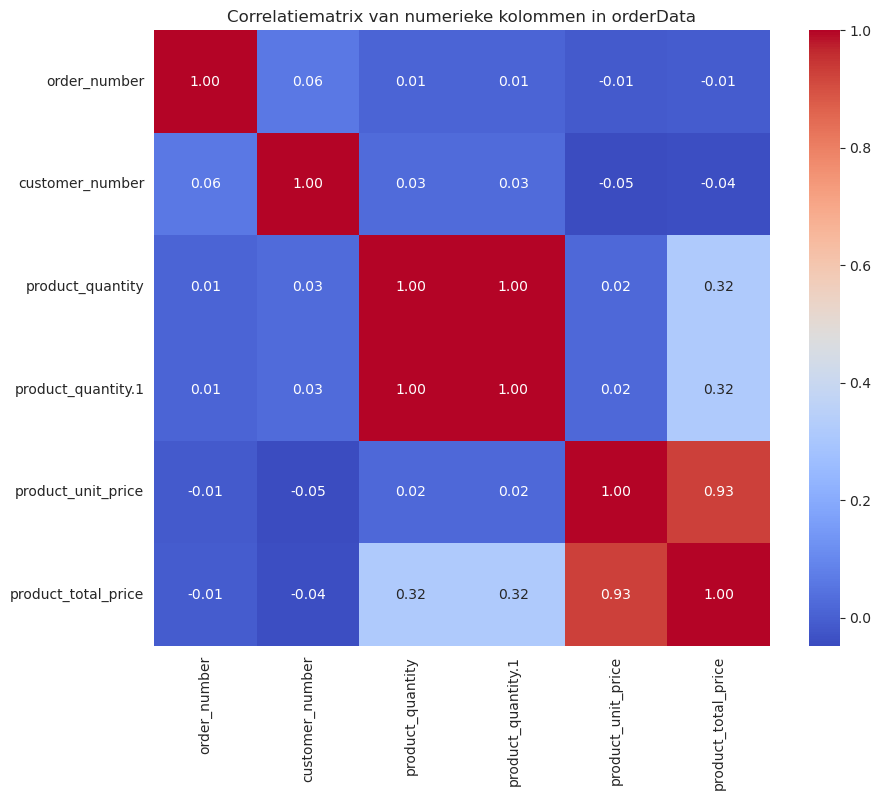

In [12]:
# Alleen numerieke kolommen selecteren
numeric_columns = orderData.select_dtypes(include=['number'])

# Correlatiematrix berekenen op basis van numerieke kolommen
corr_matrix = numeric_columns.corr()

# Correlatiematrix weergeven
print("-----Correlatiematrix op basis van numerieke kolommen-----")
print(corr_matrix)

# Visuele heatmap van de correlatiematrix maken
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlatiematrix van numerieke kolommen in orderData")
plt.show()